In [17]:
from statsmodels.tsa.statespace.structural import UnobservedComponents, UnobservedComponentsResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
import mlflow
import json
from statspace.data import read_data, preprocess_data, get_smhi_data, preprocess_smhi_data
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from copy import deepcopy

In [10]:
data_params = dict(
    parameter = 1,
    station = 97510,
    period = 'corrected-archive'
)
model_params = dict(
    autoregressive=2,
    trend=True,
    level=True,
    freq_seasonal=[
        {
            'period':365,
            'harmonics':10,
            'stochastic':False
        },
        {
            'period':365*12,
            'harmonics': 3,
            'stochastic': False
        }
    ],
    stochastic_trend=True,
    stochastic_level=False,
    irregular=True
    
)

experiment_params = dict(
    horizon = 'd',
    freq = 'd',
    start = "2025-05-01",
    periods = 5
)

In [12]:
def parse_model_params(params):
    parsed_params = deepcopy(params)
    freq_seasonal = parsed_params['freq_seasonal']
    stochastic_freq_seasonal = []
    for s in freq_seasonal:
        stochastic_freq_seasonal.append(s.pop('stochastic'))
    parsed_params['stochastic_freq_seasonal'] = stochastic_freq_seasonal
    return parsed_params

def calc_metrics(actual, pred):
    result = {
        "MSE": np.mean(np.square(actual - pred)),
        "MAE": np.mean(np.abs(actual - pred))
    }
    return result

def build_model(params, endog, exog=None):
    parsed_params = parse_model_params(params)
    parsed_params['endog'] = endog
    parsed_params['exog'] = exog
    model = UnobservedComponents(**parsed_params)
    return model

def train_model(model: UnobservedComponents, results: UnobservedComponentsResults | None = None, append_data=None, extend_data=None):
    if append_data is not None:
        assert results is not None, "If append is passed results should not be None"
        results.append(append_data)
        return results
        
    if extend_data is not Nonde:
        assert results is not None:
        results.extend(extend_data)
        return results

    results = model.fit()
    return results

def run_experiment()

In [13]:
df = get_smhi_data()


In [14]:
ts = preprocess_smhi_data(df)

In [15]:
ts

1985-06-01    15.042857
1985-06-02    16.337500
1985-06-03    12.787500
1985-06-04    14.212500
1985-06-05    11.687500
                ...    
2025-02-25     4.062500
2025-02-26     3.958333
2025-02-27     2.787500
2025-02-28     1.279167
2025-03-01    -1.514286
Freq: D, Length: 14519, dtype: float64

In [5]:
train = ts['1996':'2024']
test = ts['2025':]

<Axes: >

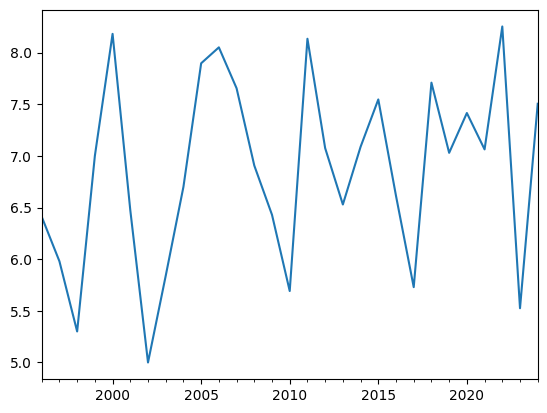

In [6]:
train.resample("YE").median().plot()

In [8]:
params = dict(
    autoregressive=2,
    trend=True,
    level=True,
    freq_seasonal=[
        {
            'period':365,
            'harmonics':10
        },
        {
            'period':365*12,
            'harmonics': 3
        }
    ],
    stochastic_trend=True,
    stochastic_level=False,
    stochastic_freq_seasonal=[False, False],
    irregular=True
    
)   

mlflow.log_params(params)

model = UnobservedComponents(
    train,
    **params
)


In [9]:
results = model.fit()

/home/shahab/.virtualenvs/bayes/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
2025/06/18 09:17:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/18 09:17:59 WARNING mlflow.statsmodels: The fitted model is larger than 100 MB, saving it as artifacts is time consuming.
To reduce model size, use `mlflow.statsmodels.autolog(log_models=False)` and manually log model by `mlflow.statsmodels.log_model(model, remove_data=True, artifact_path="model")`
2025/06/18 09:18:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [20]:
sim_results = results.simulate(nsimulations=10, anchor='end',)

In [13]:
mlflow.get_active_trace_id()

In [21]:
sim_results

2025-01-01   -1.490662
2025-01-02    1.509851
2025-01-03   -0.018938
2025-01-04    0.971493
2025-01-05    2.602935
2025-01-06    7.665134
2025-01-07    7.439712
2025-01-08    2.083826
2025-01-09    1.068123
2025-01-10   -3.631963
Freq: D, Name: y, dtype: float64

In [19]:
forecaster.conf_int()

,lower y,upper y
2025-01-01,-8.875038,0.793848
2025-01-02,-9.476188,3.005341
2025-01-03,-9.537354,4.340835
2025-01-04,-9.431064,5.200061
2025-01-05,-9.279923,5.773882
2025-01-06,-9.131449,6.165224
2025-01-07,-9.003852,6.434608
2025-01-08,-8.902595,6.619715
2025-01-09,-8.827509,6.744989
2025-01-10,-8.776077,6.826831


In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Unobserved Components Results                            
====================================================================================
Dep. Variable:                            y   No. Observations:                10593
Model:                         smooth trend   Log Likelihood              -24657.661
                   + freq_seasonal(365(10))   AIC                          49325.323
                   + freq_seasonal(4380(3))   BIC                          49361.649
                                    + AR(2)   HQIC                         49337.585
Date:                      Wed, 18 Jun 2025                                         
Time:                              08:30:12                                         
Sample:                          01-01-1996                                         
                               - 12-31-2024                                         
Covariance Type:                        opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.1522      0.003     60.848      0.000       0.147       0.157
sigma2.trend       2.65e-11   6.11e-10      0.043      0.965   -1.17e-09    1.22e-09
sigma2.ar            5.8075      0.000   2.41e+04      0.000       5.807       5.808
ar.L1                0.8351      0.008    105.008      0.000       0.820       0.851
ar.L2               -0.0590      0.008     -7.040      0.000      -0.075      -0.043
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               681.95
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            -0.01
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.03e+19. Standard errors may be unstable.
"""

/home/shahab/.virtualenvs/bayes/lib/python3.12/site-packages/statsmodels/tsa/statespace/structural.py:1738: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


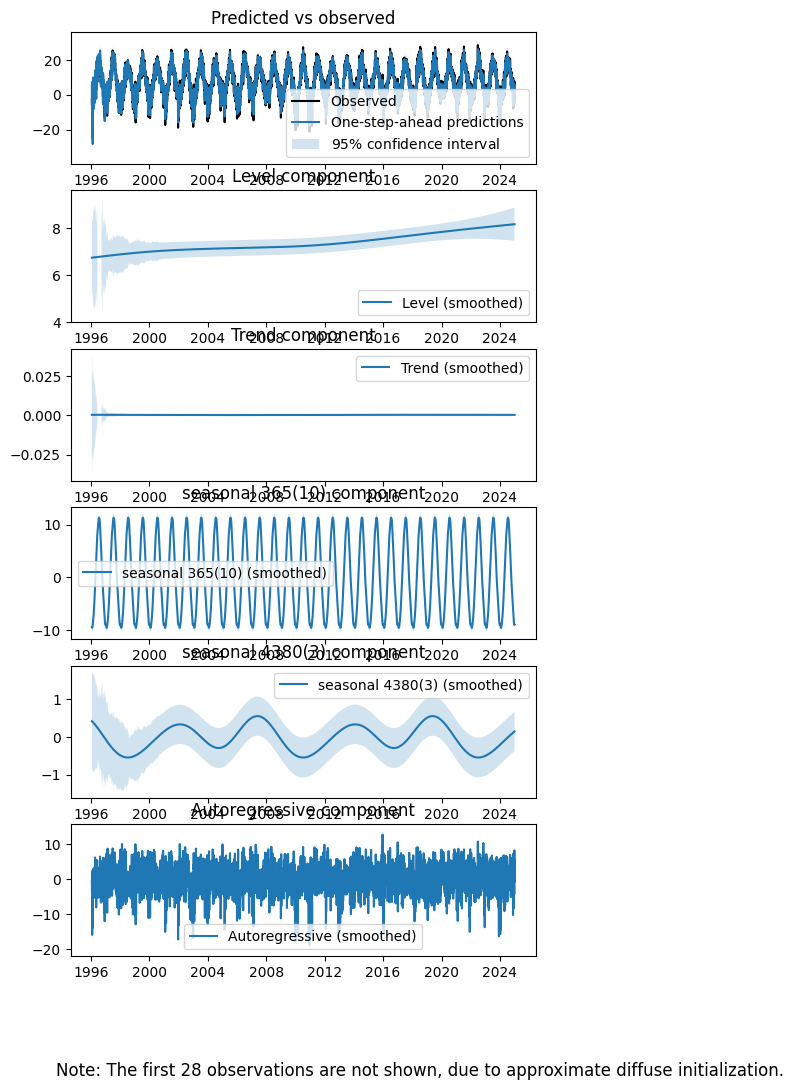

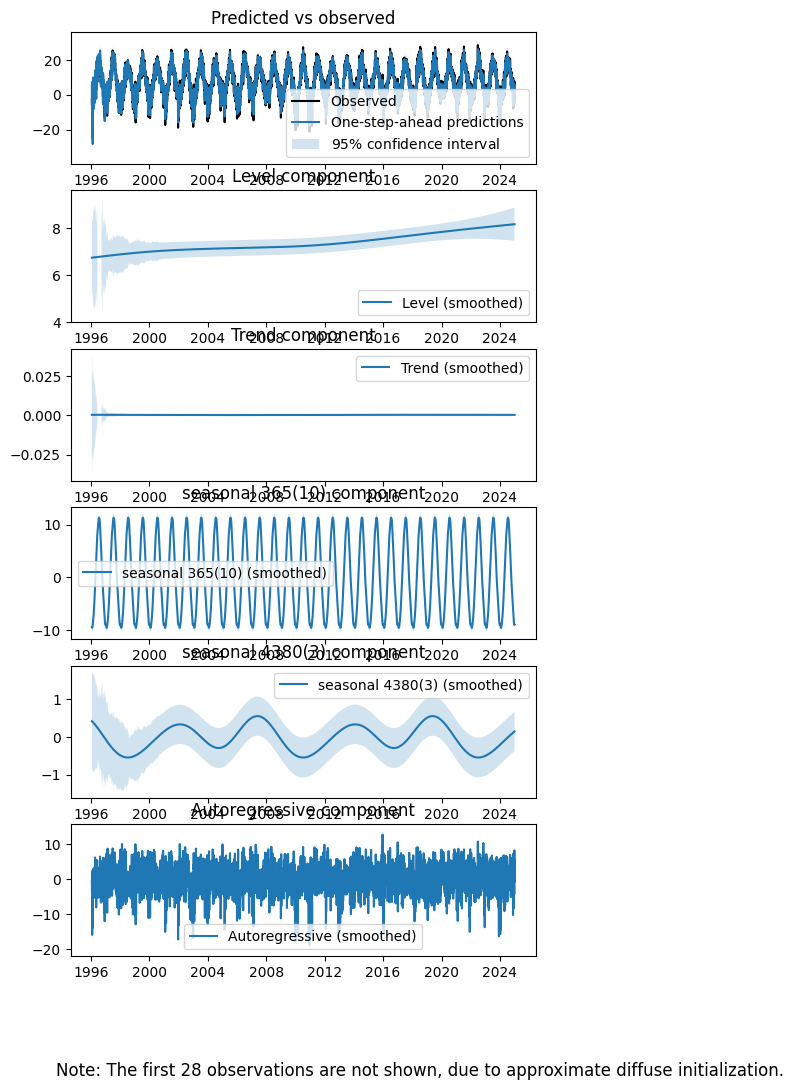

In [10]:
fig = plt.figure(figsize=(6,12))
results.plot_components(fig=fig, legend_loc='best')

In [11]:
forecast_steps = test.shape[0]
preds = results.forecast(steps=forecast_steps)

In [12]:
forecaster = results.get_forecast(forecast_steps)

In [13]:
previous_year = train[-forecast_steps:]
previous_year.index = preds.index

In [14]:
def plot(train, test, forecaster):
    cmap = plt.get_cmap('plasma')
    train[-30:].plot()
    test.plot(label='Actual', style='-', color='black')
    # previous_year.plot(label='Previous Year')
    preds.plot(label="Forecast", color='black', style='--')
    plt.legend()
    alphas = np.linspace( 0.01, 0.49, num=100)
    color_val = (alphas - alphas.min())/(alphas.max()- alphas.min())
    for a, c in zip(alphas, color_val):
        preds_prob = forecaster.summary_frame(alpha=a)
        upper = preds_prob.mean_ci_upper
        lower = preds_prob.mean_ci_lower
        plt.fill_between(x=preds.index, y1=lower, y2=upper, color=cmap(c), alpha=.05)

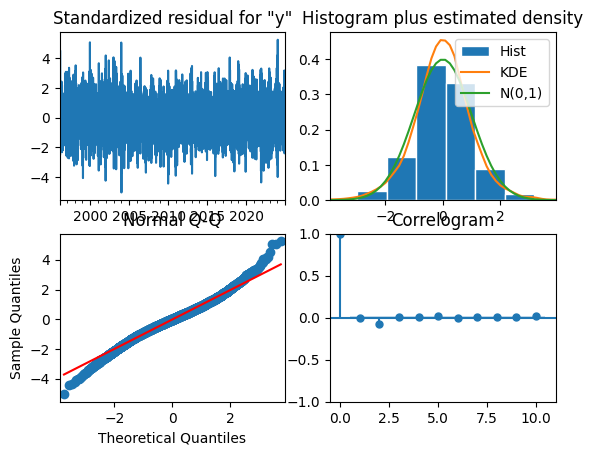

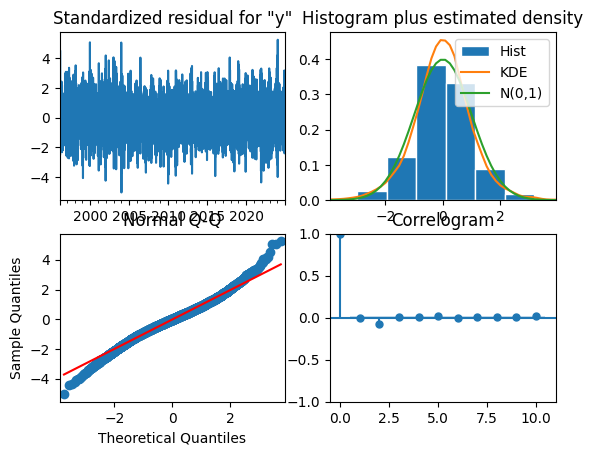

In [15]:
results.plot_diagnostics()

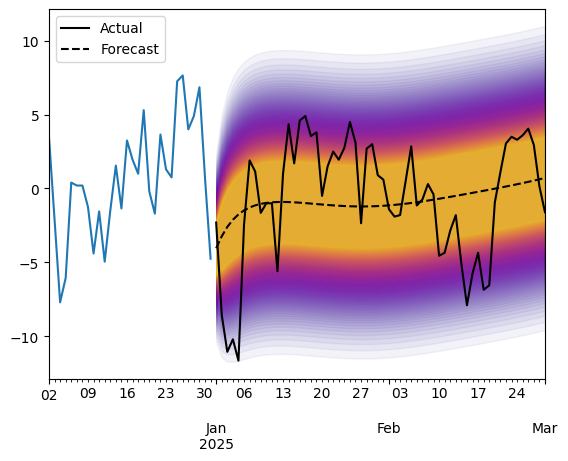

In [16]:
plot(train, test, forecaster)

In [107]:
np.mean(np.square(preds - test))


np.float64(15.40247893721505)

In [106]:
np.mean(np.square(previous_year - test))

np.float64(36.90391666666666)

(array([1., 1., 2., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
        3., 0., 1.]),
 array([-1.98094152, -1.75573557, -1.53052962, -1.30532367, -1.08011773,
        -0.85491178, -0.62970583, -0.40449988, -0.17929393,  0.04591202,
         0.27111797,  0.49632392,  0.72152986,  0.94673581,  1.17194176,
         1.39714771,  1.62235366,  1.84755961,  2.07276556,  2.2979715 ,
         2.52317745]),
 <BarContainer object of 20 artists>)

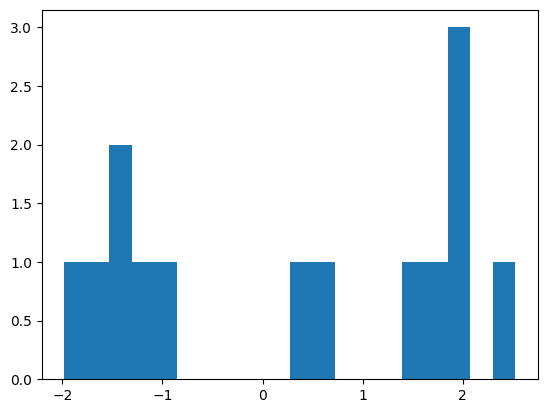

In [27]:
plt.hist(test-preds, bins=20)

In [16]:
new_results = results.extend(test[:365])

In [17]:
preds = new_results.forecast(steps=365)

In [221]:
preds

2012-01-01   -4.861759
2012-01-02   -4.973914
2012-01-03   -5.038962
2012-01-04   -5.059396
2012-01-05   -5.037820
                ...   
2013-12-26   -5.227281
2013-12-27   -5.389204
2013-12-28   -5.527946
2013-12-29   -5.640942
2013-12-30   -5.725998
Freq: D, Name: predicted_mean, Length: 730, dtype: float64

In [28]:
np.mean(np.square(train['2011-01-01':'2011-04-30'].values - test.values[:120]))

np.float64(48.45166666666667)

In [19]:
preds

2012-01-01    -5.402976
2012-01-02    -5.917787
2012-01-03    -6.116087
2012-01-04    -5.939427
2012-01-05    -5.404822
                ...    
2012-04-25    13.873879
2012-04-26    14.125200
2012-04-27    14.003270
2012-04-28    13.539279
2012-04-29    12.833280
Freq: D, Name: predicted_mean, Length: 120, dtype: float64

In [229]:
results.4()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Unobserved Components Results                            
=====================================================================================
Dep. Variable:                temp_corrected   No. Observations:                 3480
Model:                                  None   Log Likelihood               -7530.944
                   + stochastic seasonal(12)   AIC                          15073.888
                                     + AR(2)   BIC                          15110.795
Date:                       Thu, 12 Jun 2025   HQIC                         15087.066
Time:                               16:41:34                                         
Sample:                           01-31-1722                                         
                                - 12-31-2011                                         
Covariance Type:                         opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
sigma2.level        0.0004      0.001      0.802      0.423      -0.001       0.002
sigma2.trend      1.68e-09   4.64e-09      0.362      0.717   -7.41e-09    1.08e-08
sigma2.seasonal   1.74e-05   6.28e-05      0.277      0.782      -0.000       0.000
sigma2.ar           4.3841      0.083     52.790      0.000       4.221       4.547
ar.L1               0.3474      0.016     22.138      0.000       0.317       0.378
ar.L2               0.0305      0.016      1.860      0.063      -0.002       0.063
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               395.46
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.43
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/shahab/.virtualenvs/bayes/lib/python3.12/site-packages/statsmodels/tsa/statespace/structural.py:1738: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


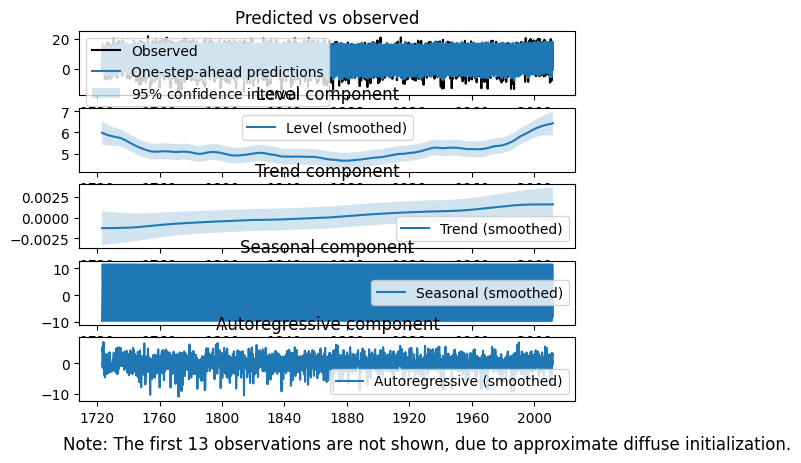

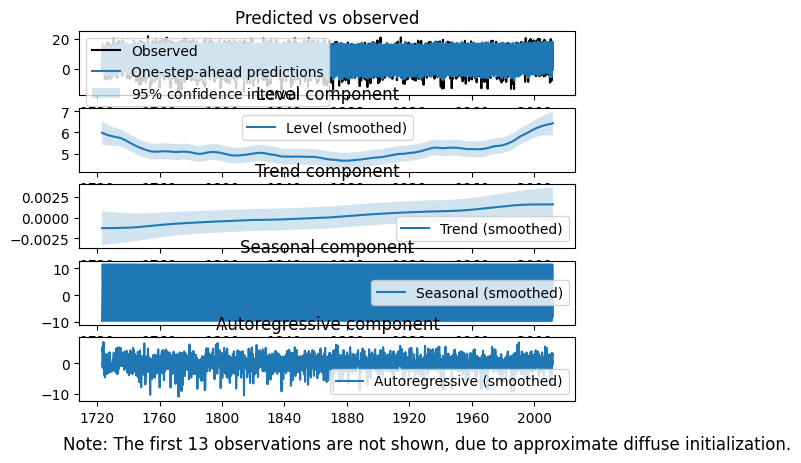

In [231]:
results.plot_components(legend_loc=None)

In [ ]:
results